<a href="https://colab.research.google.com/github/faghoo2010/Int-Elligence/blob/master/Oladele2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/sample_data/Diabetes-Classification.csv')

In [ ]:
df.head()

,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis
0,45,Male,25.0,Normal,100,5.7,No,No,Healthy,Regular,No
1,55,Female,30.0,High,120,6.4,Yes,Yes,Poor,No,Yes
2,65,Male,35.0,High,140,7.1,Yes,Yes,Poor,No,Yes
3,75,Female,40.0,High,160,7.8,Yes,Yes,Poor,No,Yes
4,40,Male,20.0,Normal,80,5.0,No,No,Healthy,NaN,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         128 non-null    int64  
 1   Gender                      128 non-null    object 
 2   BMI                         125 non-null    float64
 3   Blood Pressure              128 non-null    object 
 4   FBS                         128 non-null    int64  
 5   HbA1c                       128 non-null    float64
 6   Family History of Diabetes  126 non-null    object 
 7   Smoking                     126 non-null    object 
 8   Diet                        126 non-null    object 
 9   Exercise                    127 non-null    object 
 10  Diagnosis                   128 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 11.1+ KB


In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
BMI,3
Blood Pressure,0
FBS,0
HbA1c,0
Family History of Diabetes,2
Smoking,2
Diet,2
Exercise,1


In [ ]:
df=df.dropna()

In [ ]:
df.head()

,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis
0,45,Male,25.0,Normal,100,5.7,No,No,Healthy,Regular,No
1,55,Female,30.0,High,120,6.4,Yes,Yes,Poor,No,Yes
2,65,Male,35.0,High,140,7.1,Yes,Yes,Poor,No,Yes
3,75,Female,40.0,High,160,7.8,Yes,Yes,Poor,No,Yes
5,50,Female,25.0,Normal,100,5.7,No,No,Healthy,Regular,No


#Problems with categorical values in columns:
#1: these are in string format
#2: categorical variables confuses

In [ ]:
#label encoding
from sklearn.preprocessing import LabelEncoder
cat_col=['Diagnosis']

le=LabelEncoder()

for col in cat_col:
    df[col]=le.fit_transform(df[col])

df.head()

,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis
0,45,Male,25.0,Normal,100,5.7,No,No,Healthy,Regular,0
1,55,Female,30.0,High,120,6.4,Yes,Yes,Poor,No,1
2,65,Male,35.0,High,140,7.1,Yes,Yes,Poor,No,1
3,75,Female,40.0,High,160,7.8,Yes,Yes,Poor,No,1
5,50,Female,25.0,Normal,100,5.7,No,No,Healthy,Regular,0


In [ ]:
#one hot encoding
one_encoded= pd.get_dummies(df,columns=['Gender'])
one_encoded.head()

,Age,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis,Gender_Female,Gender_Male
0,45,25.0,Normal,100,5.7,No,No,Healthy,Regular,0,False,True
1,55,30.0,High,120,6.4,Yes,Yes,Poor,No,1,True,False
2,65,35.0,High,140,7.1,Yes,Yes,Poor,No,1,False,True
3,75,40.0,High,160,7.8,Yes,Yes,Poor,No,1,True,False
5,50,25.0,Normal,100,5.7,No,No,Healthy,Regular,0,True,False


#how to choose either label encoding or onehot encoding:
#it depends on the type of categorical variable:

#label encoding: when values in features are ordinal: order Ex: Education - Bachelors>Masters>Doctorate
#Onehotending: When categories are not in order (Nominal Values):  Gender- Male, Female, Smoking etc

In [ ]:
#we are applying one hot encoding

cat_col=['Gender','Exercise','Blood Pressure', 'Family History of Diabetes', 'Smoking', 'Diet']

one_encoded= pd.get_dummies(df,columns=cat_col)

In [ ]:
one_encoded.head()

,Age,BMI,FBS,HbA1c,Diagnosis,Gender_Female,Gender_Male,Exercise_No,Exercise_Regular,Blood Pressure_High,Blood Pressure_Low,Blood Pressure_Normal,Family History of Diabetes_No,Family History of Diabetes_Yes,Smoking_No,Smoking_Yes,Diet_Healthy,Diet_Poor
0,45,25.0,100,5.7,0,False,True,False,True,False,False,True,True,False,True,False,True,False
1,55,30.0,120,6.4,1,True,False,True,False,True,False,False,False,True,False,True,False,True
2,65,35.0,140,7.1,1,False,True,True,False,True,False,False,False,True,False,True,False,True
3,75,40.0,160,7.8,1,True,False,True,False,True,False,False,False,True,False,True,False,True
5,50,25.0,100,5.7,0,True,False,False,True,False,False,True,True,False,True,False,True,False


In [ ]:
#label encoding the one hot encoded columns to convert all the string values in newly generated columns to integers
cat_col=[ 'Gender_Female',
       'Gender_Male', 'Exercise_No', 'Exercise_Regular', 'Blood Pressure_High',
       'Blood Pressure_Low', 'Blood Pressure_Normal',
       'Family History of Diabetes_No', 'Family History of Diabetes_Yes',
       'Smoking_No', 'Smoking_Yes', 'Diet_Healthy', 'Diet_Poor']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in cat_col:
    one_encoded[col]=le.fit_transform(one_encoded[col])

In [ ]:
one_encoded.head()

,Age,BMI,FBS,HbA1c,Diagnosis,Gender_Female,Gender_Male,Exercise_No,Exercise_Regular,Blood Pressure_High,Blood Pressure_Low,Blood Pressure_Normal,Family History of Diabetes_No,Family History of Diabetes_Yes,Smoking_No,Smoking_Yes,Diet_Healthy,Diet_Poor
0,45,25.0,100,5.7,0,0,1,0,1,0,0,1,1,0,1,0,1,0
1,55,30.0,120,6.4,1,1,0,1,0,1,0,0,0,1,0,1,0,1
2,65,35.0,140,7.1,1,0,1,1,0,1,0,0,0,1,0,1,0,1
3,75,40.0,160,7.8,1,1,0,1,0,1,0,0,0,1,0,1,0,1
5,50,25.0,100,5.7,0,1,0,0,1,0,0,1,1,0,1,0,1,0


#Assignment:

#Perform -
#Descriptive analysis
#Exploratory data analysis
#here.

#we will discuss about these in the mentoring session

In [ ]:
#Feature Selection: Removing irrelevant features which does not contribute towards the label(Diagnosis)
#defining feature selection model
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=5)

In [ ]:
#splitting label and features
x=one_encoded.drop('Diagnosis', axis=1)
y=one_encoded['Diagnosis']

In [ ]:
#applying feature selection
x_selected=selector.fit_transform(x,y)
selected_features=x.columns[selector.get_support()]
print(selected_features)

Index(['Exercise_Regular', 'Smoking_No', 'Smoking_Yes', 'Diet_Healthy',
       'Diet_Poor'],
      dtype='object')


In [ ]:
#created df with selected features
x1=one_encoded[selected_features]

In [ ]:
#train test split
from sklearn.model_selection import train_test_split

#for all features
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.4,random_state=10)

In [ ]:
#for selected features
x1_train, x1_test, y_train, y_test=train_test_split(x1,y,test_size=0.4,random_state=10)

In [ ]:
#building knn models
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5)
knn_selected=KNeighborsClassifier(n_neighbors=5)

In [ ]:
#training models
#all features
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)


#selcted features
knn_selected.fit(x1_train,y_train)
y_pred_knn1=knn_selected.predict(x1_test)

In [ ]:
#classification report

from sklearn.metrics import classification_report

print("nKNN Performance:")
print(classification_report(y_test, y_pred_knn))

print("nKNN_Selected Performance:")
print(classification_report(y_test, y_pred_knn1))

nKNN Performance:
              precision    recall  f1-score   support

           0       0.82      0.69      0.75        39
           1       0.20      0.33      0.25         9

    accuracy                           0.62        48
   macro avg       0.51      0.51      0.50        48
weighted avg       0.70      0.62      0.66        48

nKNN_Selected Performance:
              precision    recall  f1-score   support

           0       1.00      0.54      0.70        39
           1       0.33      1.00      0.50         9

    accuracy                           0.62        48
   macro avg       0.67      0.77      0.60        48
weighted avg       0.88      0.62      0.66        48



In [ ]:
from sklearn.svm import SVC

svm=SVC(kernel='rbf', probability=True,random_state=10 )
svm_selected=SVC(kernel='rbf', probability=True,random_state=10 )

In [ ]:
#training models
#all features
svm.fit(x_train,y_train)
y_pred_svm=svm.predict(x_test)


#selcted features
svm_selected.fit(x1_train,y_train)
y_pred_svm1=svm_selected.predict(x1_test)

In [ ]:
#classification report

from sklearn.metrics import classification_report

print("SVM Performance:")
print(classification_report(y_test, y_pred_svm))

print("nSVM_Selected Performance:")
print(classification_report(y_test, y_pred_svm))

SVM Performance:
              precision    recall  f1-score   support

           0       0.81      1.00      0.90        39
           1       0.00      0.00      0.00         9

    accuracy                           0.81        48
   macro avg       0.41      0.50      0.45        48
weighted avg       0.66      0.81      0.73        48

nSVM_Selected Performance:
              precision    recall  f1-score   support

           0       0.81      1.00      0.90        39
           1       0.00      0.00      0.00         9

    accuracy                           0.81        48
   macro avg       0.41      0.50      0.45        48
weighted avg       0.66      0.81      0.73        48



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

<Axes: >

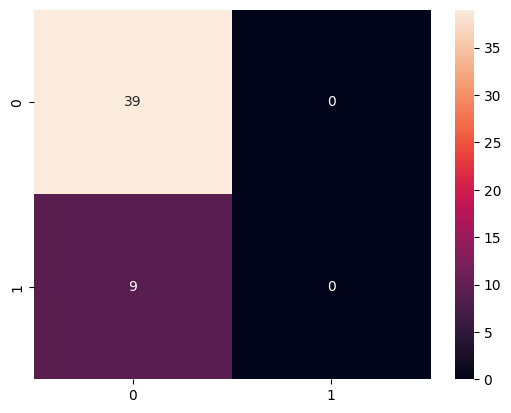

In [ ]:
#confusion: it show labelwise performance of the model

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred_svm)
sns.heatmap(cm,annot=True)

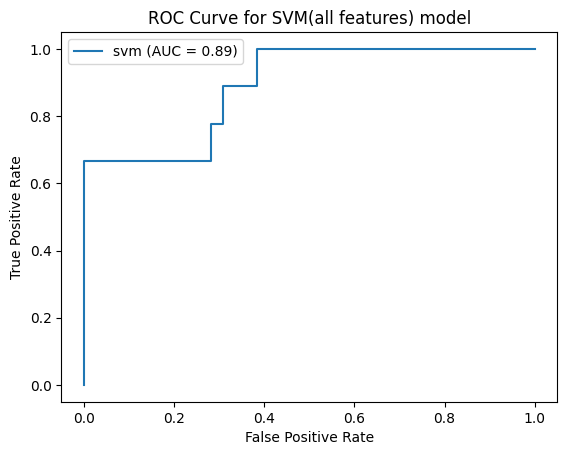

In [ ]:
#plot ROC curve for svm all features model
from sklearn.metrics import roc_auc_score, roc_curve

y_proba = svm.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'{'svm'} (AUC = {roc_auc_score(y_test, y_proba):.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM(all features) model')
plt.legend()
plt.show()

#Assignment:

#1:Plot confusion matrix and ROC curves for other models
#2:Learn more about evaluation metrics sucha as confusion matrix, accuracy, precision, recall, AUC, ROC etc
#3:Compare the performance(accuracy, f1 score etc) of SVM and KNN models we created using graph plots
#4: Re-do the entire analysis with label encoding instead of one hot encoding and notice performance difference

#we will discuss about these in mentoring session